![](https://live.staticflickr.com/65535/50931445562_96fb599a02_m.jpg)

# Example Notebook
This notebook will show you how to use the methods we have created for this tool.  
  
**Purpose:** to predict the change of a protein after being in space.  Space conditions include increased radiation and near-zero gravity which affects how organisms replicate and re-produce genes and proteins.  Taking into account proteins of known change measured by the NASA GeneLab initiative (as presented as a log ratio), we have developed a model to predict the change for a protein of your interest.
  
**Input:** *Either* 1) protein accession number (GI) for the protein of interest or 2) the amino acid sequence for the protein of interst *AND* an email address to do the query of the sequence.  Note: if you already have a sequence, the tool will skip the sequence fetching step and your email will not be used.

### Import Python packages and methods from `utils.py`

In [1]:
import utils as u

### Input a protein accession number or a sequence.  Here, we will demonstrate both input types.

In [2]:
# Sample Input 1
prot_acc_num_1 = 15600267

# Sample Input 2
sequence_2 = 'mlpamrtgllcallgvtapawaeyvtvisfggankeaqetafykpfksatgnrvvhgsyngdlaklkrmveishvswdvveveapelargceeglfekldmakvgdpadfvpgavqpcgvgifvwttllaynpgkvagspqgwadfwdvkkfpgkrglrwgakyslefalmadgvapkdvyqtlatpagverafrkldelkpyihwwksgqdpvrdladgtvvmssayngriaaaqaekqrlamvwsggvydfdfwalpvgvwkkqlaeefirfasqpeqqkafaeniaygpanrkavglldpqvaanlptapqnmqnavgmnvafwaehgealeqrfqnwakr'

# Sample Input 3
prot_acc_num_3 = 15595355

### Use the `predict_log2fc()` function to predict the change in expression of these inputs in space

In [3]:
log2fc_1 = u.predict_log2fc(prot_acc_num_1, 'jaking11@uw.edu')
log2fc_2 = u.predict_log2fc(sequence_2, 'jaking11@uw.edu')
log2fc_3 = u.predict_log2fc(prot_acc_num_3, 'jaking11@uw.edu')

The predicted log2fc is  0.168
The predicted log2fc is  -0.0162
The predicted log2fc is  0.5692


In [4]:
log2fc, df = u.predict_log2fc(prot_acc_num_3, 'jaking11@uw.edu')
df

The predicted log2fc is  0.5692


,AA_NP,AA_POS,AA_POL,AA_NEG,MW,AROM,ISO_E,LOG2FC
0,51.97,12.64,23.6,11.8,38263.67,0.047753,8.726005,0.5692


### There are a couple other things we can do with inner functions within this tool:
1. Get the protein sequence using Biopython.Entrez module for the sample protein accession number
2. Determine the mass of the protein
3. Determine the percentages of amino acids present in the protein

### 1. Get protein sequence

In [5]:
sequence_1 = u.get_seq('jaking11@uw.edu', prot_acc_num_1)
print(sequence_1)

mievrnllkvfdtrgqvvravddvstrvargevlvvigpsgsgkstflrclngleefdegsvsidgvdladprtdinayrrevgmvfqhfnlfphmtvlenlclaqrvvrkrgkaereakarallakvgigqkadeypsrlsggqqqrvaiaralcmdpkvmlfdeptsaldpemvgevldvmktlavegmtmvcvthemgfarevadrvlffdhgklledappaqffdnpqdpraqaflrqvl


### 2. Determine mass of protein

In [6]:
mass_1 = u.get_prot_mass(sequence_1)
print(mass_1)

27056.93


### 3. Determine percentages of amino acids present in the protein

In [7]:
nonpolar, positive, polar, negative = u.count_aa_types(sequence_2)
print('nonpolar:', nonpolar)
print('positive:', positive)
print('polar:', polar)
print('negative:', negative)

nonpolar: 59.59
positive: 11.92
polar: 17.73
negative: 10.76


## You can also find log2fc predictions for *multiple* molecules of interest at once with `multi_pred_log2fc`

In [8]:
IDs = [15600267, 15595355]
email = 'roryjm@uw.edu'
predicted_log2fcs = u.multi_pred_log2fc(IDs, email)
print(predicted_log2fcs)

The predicted log2fc is  0.168
The predicted log2fc is  0.5692
[0.168, 0.5692]


## We've made a simple visualization tool to relate the input protein to other species for the same molecule type

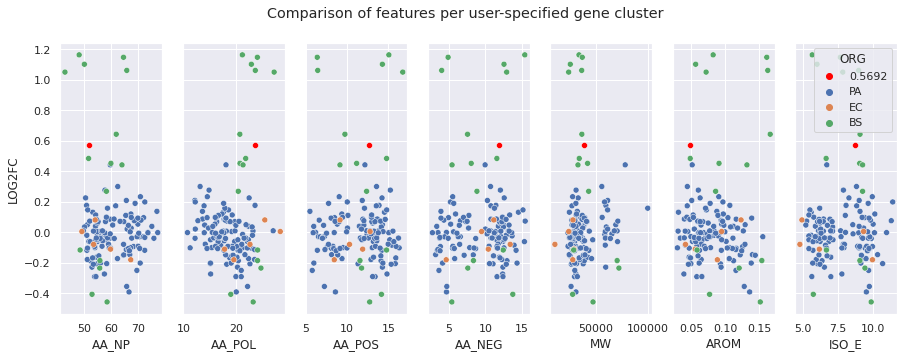

In [9]:
u.cluster_visuals(df, 'ABC_transporter')